## Mark

- Marking in `pytest` allows you to **add metadata** to your test functions, such as categorizing tests or marking them with certain properties like 'slow' or 'fast'.

Marks are needed when:

1. **Selective Testing**: You want to run a subset of tests based on certain criteria, such as all 'slow' tests or all 'integration' tests. (like tag)
2. **Conditionally Skipping Tests**: You need to skip tests under certain conditions, such as `missing dependencies` or an `unsupported platform`.
3. **Expected Failures**: You want to mark tests that are known to fail, possibly due to a known bug that hasn't been fixed yet.


### Add tag to test function

- add `slow` tag to the `test_very_slow()` function

```
@pytest.mark.slow
def test_very_slow():
    time.sleep(5)
    assert calc.add(10,5) == 15
```


### Filter by tag and run test

- `pytest -m slow`
  - only run test that tag as `slow`


### Skip test

1. Add `skip` tag to function

```
@pytest.mark.skip(reason="This feature is currently broken")
def test_add():
    assert calc.add(10,5) == 14
```

2. `pytest` will automatically ignore this function


### Mark those fails we already know

1. Add `xfail` tag to those functions

```
@pytest.mark.xfail(reason="We know this gonna fail")
def test_divide_zero():
    assert calc.divide(10,5)
```

2. Result will use `X` to show these fails

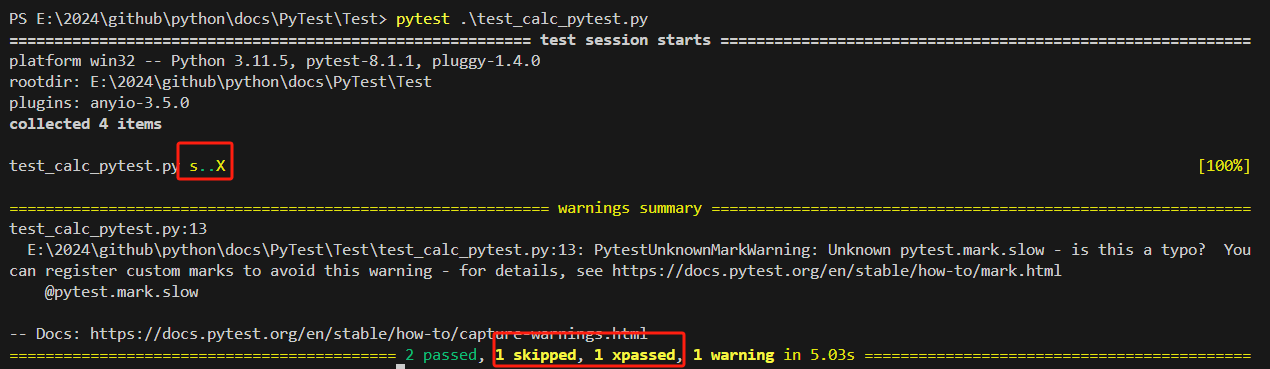


## Parameterization

Parameterization in `pytest` is a powerful feature used for running a test function multiple times **with different sets of arguments**.

- It's also a `mark` in `pytest`

Parameterization is needed when:

1. **Testing Various Input Sets**: You have a function that should work correctly with various inputs, and you want to test all these cases without writing separate test functions for each input set.
2. **Cross-Browser or Cross-Platform Testing**: You want to run the same tests across multiple environments, such as different browsers or operating systems.
3. **Boundary Value Testing**: When you want to test edge cases or boundary values for a function, parameterization allows you to easily define these boundary values as parameters.

### Example

- We want to test the `area()` function of `Square` class

```
class Rectangle(Shape):
    def __init__(self,length,width) -> None:
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.width

    def perimeter(self):
        return 2 * (self.length + self.width)

    def __eq__(self, other: object) -> bool:
        if not isinstance(other,Rectangle):
            return False
        return self.width == other.width and self.length == self.length

class Square(Rectangle):
    def __init__(self, side_length) -> None:
        super().__init__(side_length, side_length)

```

2. use `pytest.mark.parameterize("params",[args])` to tag the test function

```
@pytest.mark.parametrize("side_length, expected_area",[(5,25),(4,16),(9,81)])
def test_multiple_square_areas(side_length, expected_area):
    assert shapes.Square(side_length).area() == expected_area
```

3. Show result

   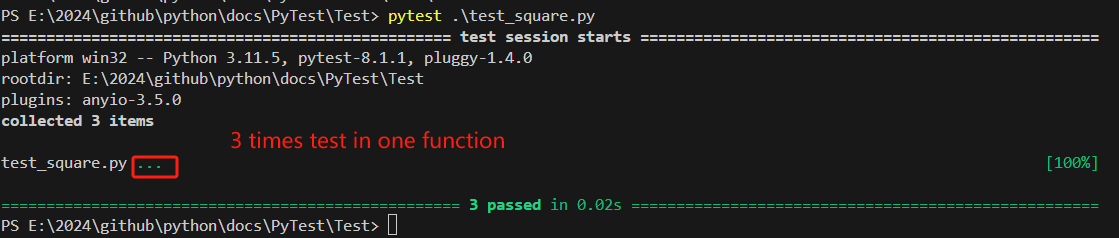
